# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#import credit file
credit = pd.read_csv('default of credit card clients.csv', header =1)

## EDA

In [3]:
credit.head()
credit.describe()
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [4]:
#Correlation Matrix
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

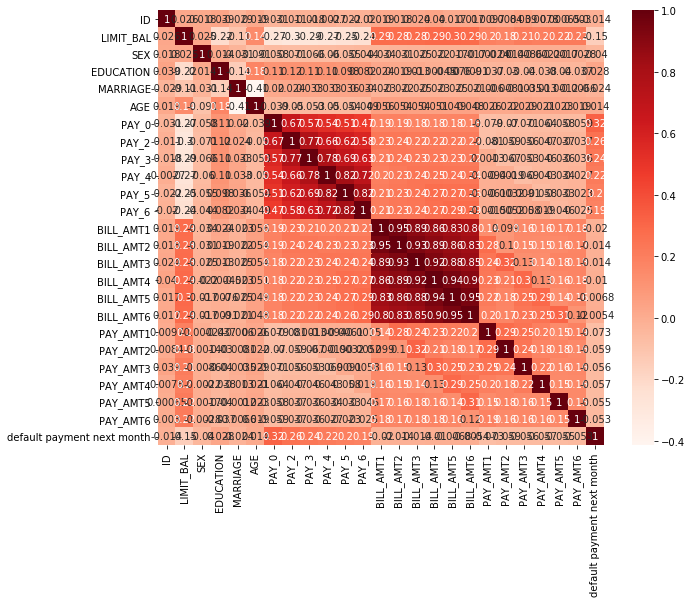

In [5]:
#Correlation Plotted
sns.heatmap(corrMat, annot=True, cmap=plt.cm.Reds)

In [6]:
#Covariance Estimation
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

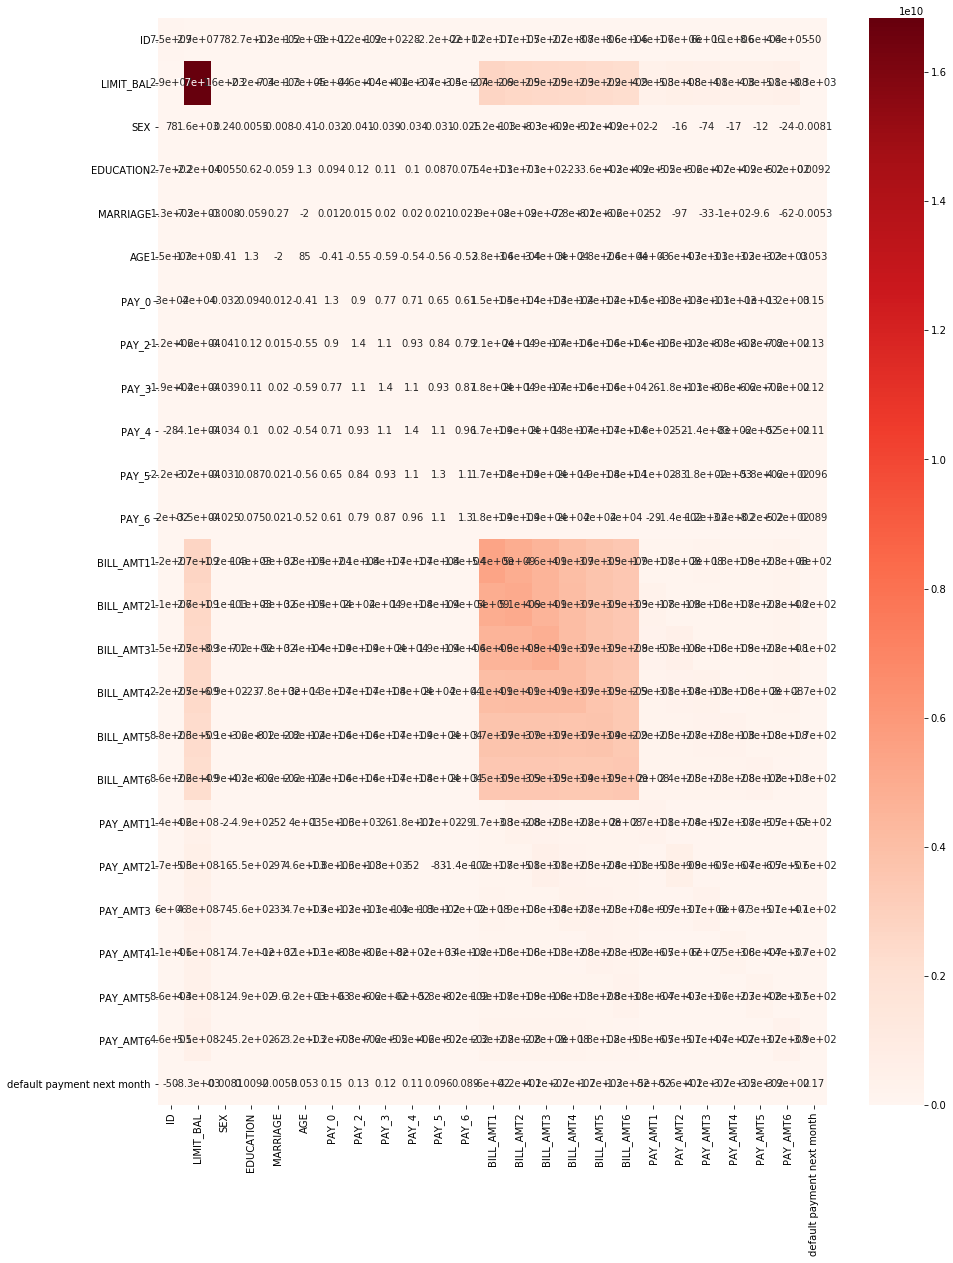

In [7]:
#Covariance Plotted
pylab.rcParams['figure.figsize'] = (15.0, 20.0)
sns.heatmap(covMat, annot=True, cmap=plt.cm.Reds)
pylab.rcParams['figure.figsize'] = (15.0, 12.0)

## Pre-process

In [8]:
#null values removed if any
x = credit.isnull()
x.describe()
credit.dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


ID feature removed. Also due to some covariance to Bill Amount and Correlation of BILL_AMT attributes, part of the BILL_AMT columns were removed.

In [9]:
#Id field dropped
credit['ID']
credit = credit.drop('ID',1)
credit = credit.drop('BILL_AMT2',1)
credit = credit.drop('BILL_AMT4',1)
credit = credit.drop('BILL_AMT6',1)

## Selecting and Dividing the data

In [10]:
## Train and Test models

In [11]:
#features
features = credit.iloc[:,0:-1]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,2682,3455,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,13559,14948,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,49291,28959,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,35835,19146,2000,36681,10000,9000,689,679


In [12]:
len(features)

30000

In [13]:
#dependent variable
depVar = credit['default payment next month']

In [14]:
X_train = features
y_train = depVar

In [15]:
len(X_train)

30000

In [16]:
len(y_train)

30000

In [17]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=6)
X_train.shape, X_test.shape

((21000, 20), (9000, 20))

In [18]:
y_train.shape, y_test.shape

((21000,), (9000,))

## Classifiers

## Model KNeighborsClassifier classifier

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', 
          class_weight='balanced')

In [21]:
dic = {0: "N", 1: "Y"}

In [22]:
y_train = y_train.map(dic)

In [23]:
pd.factorize(y_train)

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['N', 'Y'], dtype='object'))

In [24]:
y_train= y_train.astype('category')

In [ ]:
svc.fit(X_train, y_train)

## Model SVC classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection  import GridSearchCV
svc = SVC(class_weight='balanced', random_state=1)
search_space = {'C': np.logspace(-3, 3, 7)}
gridsearch = GridSearchCV(svc, 
                          param_grid=search_space, 
                          scoring='accuracy', 
                          refit=True, cv=10)
gridsearch.fit(X_train,y_train)

In [ ]:
cv = gridsearch.best_score_
test_score = gridsearch.score(X_train, y_train)
best_c =  gridsearch.best_params_['C']

In [ ]:
print('CV accuracy score: %0.3f' % cv)
print('Test accuracy score: %0.3f' % test_score)
print('Best C parameter: %0.1f' % best_c)

In [ ]:
#Make Predictions
predictions = gridsearch.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

In [ ]:
#Plot Predictions
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();